## Exercise 1

In [1]:
import numpy as np
A = np.random.random((10,3))
print(A.flat[np.argmin(abs(A-0.5), axis=1) + np.arange(0,30,3)].reshape(10,1))

[[0.56509421]
 [0.89099189]
 [0.63712189]
 [0.37691172]
 [0.32994896]
 [0.64812293]
 [0.49689644]
 [0.26383248]
 [0.33573489]
 [0.73046002]]


## Exercise 2

In [2]:
A = np.random.random((6,6))
print(np.sum(A, axis=1)/np.amin(A, axis=0))

[ 183.4020973    14.29887298   98.45692506 1842.24686711  105.4266491
    9.46693804]


## Exercise 3

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
print(np.amax(x[1:][mask[:-1]]))

5


## Exercise 4

In [4]:
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(np.ones(10) + np.bincount(i, minlength = 10))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## Exercise 5

In [5]:
print({i: np.diag(np.flip(np.arange(16).reshape(4, 4), axis = 1), 3-i).tolist() for i in range(7)})

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


## Exercise 6

Clustering completed after 15 iterations


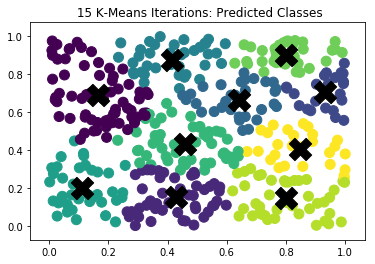

7.53443717153751e-05

In [6]:
import numpy as np

#Generating X
X = np.random.rand(400, 2)


#Defining k-means function
def kmeans(X, k, itr, thresh):
    
    centroids = X[:k]
    
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
        
        new_centroids = np.array([X[labels==j, :].mean(axis=0) for j in range(k)])
        
        dist = ((new_centroids - centroids)**2).sum()
        
        if (dist <= thresh) or (new_centroids == centroids).all():
            break
        else:
            centroids = new_centroids
    else:
        raise RuntimeError(f"Clustering algorithm did not complete within {itr} iterations")
    
    print(f"Clustering completed after {i} iterations")
    return(centroids, dist, labels, i)

centroids, dist, labels, i = kmeans(X, 10, 100, 1e-04)       

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=X[:, 0], y=X[:, 1], s=100, c=labels)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=500, c='k', marker='X')
plt.title(f" {i} K-Means Iterations: Predicted Classes")
plt.show()

dist